<a href="https://colab.research.google.com/github/wuchaojie925/no/blob/master/K2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''Importing Data Manipulattion Moduls'''
import numpy as np
import pandas as pd
from scipy import stats
import zipfile

'''Seaborn and Matplotlib Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")                    
%matplotlib inline

'''plotly Visualization'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [0]:
def get_df(zip_path, csv_path):
    with zipfile.ZipFile(zip_path) as zip:
        with zip.open(csv_path) as csv:
            df = pd.read_csv(csv)
            return df

In [0]:
building = pd.read_csv('/content/building_metadata.csv')
weather_train = get_df('/content/weather_train.csv.zip', 'weather_train.csv')
weather_test = get_df('/content/weather_test.csv.zip', 'weather_test.csv')
train = get_df('/content/train.csv.zip', 'train.csv')
test = get_df('/content/test.csv.zip', 'test.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
building = pd.read_csv('/content/drive/My Drive/K2/building_metadata.csv')
weather_train = get_df('/content/drive/My Drive/K2/weather_train.csv.zip', 'weather_train.csv')
weather_test = get_df('/content/drive/My Drive/K2/weather_test.csv.zip', 'weather_test.csv')
train = get_df('/content/drive/My Drive/K2/train.csv.zip', 'train.csv')
test = get_df('/content/drive/My Drive/K2/test.csv.zip', 'test.csv')

In [0]:
print('building.shape:' , building.shape)
print('weather_train.shape', weather_train.shape)
print('weather_test.shape', weather_test.shape)
print('train.shape', train.shape)
print('test.shape', test.shape)

building.shape: (1449, 6)
weather_train.shape (139773, 9)
weather_test.shape (277243, 9)
train.shape (20216100, 4)
test.shape (41697600, 4)


In [0]:
print('building')
display(building.sample(3))
print('weather_train')
display(weather_train.sample(3))
print('weather_test')
display(weather_test.sample(3))
print('train')
display(train.sample(3))
print('test')
display(test.sample(3))

building


,site_id,building_id,primary_use,square_feet,year_built,floor_count
713,5,713,Education,14973,1976.0,2.0
906,9,906,Lodging/residential,39649,NaN,NaN
261,2,261,Education,89770,NaN,NaN


weather_train


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
68024,7,2016-10-07 10:00:00,9.8,NaN,9.4,NaN,1024.5,50.0,0.5
86981,9,2016-12-05 20:00:00,10.6,NaN,9.4,-1.0,NaN,320.0,2.1
42030,4,2016-10-15 09:00:00,15.0,NaN,13.9,NaN,1014.5,0.0,0.0


weather_test


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
13673,0,2018-07-24 17:00:00,27.8,NaN,23.3,-1.0,1013.6,240.0,3.6
64640,3,2018-05-29 03:00:00,20.6,8.0,18.3,0.0,1017.3,160.0,2.1
155747,8,2018-12-13 05:00:00,13.3,NaN,8.3,0.0,1023.1,60.0,3.1


train


,building_id,meter,timestamp,meter_reading
17642819,960,0,2016-11-15 23:00:00,44.0000
296368,1400,1,2016-01-06 08:00:00,2.6695
14023099,547,0,2016-09-12 18:00:00,48.2200


test


,row_id,building_id,meter,timestamp
17463424,17463424,767,1,2018-08-09 05:00:00
12985833,12985833,355,0,2018-11-27 14:00:00
33926072,33926072,1225,1,2017-09-14 11:00:00


In [0]:
train = train.merge(building, on = 'building_id', how = 'left')
test = test.merge(building, on = 'building_id', how = 'left')
del building
train = train.merge(weather_train, on = ['site_id', 'timestamp'], how = 'left')
del weather_train
test = test.merge(weather_test, on = ['site_id', 'timestamp'], how = 'left')
del weather_test

In [0]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [0]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Memory usage of dataframe is 2622.02 MB
Memory usage after optimization is: 790.84 MB
Decreased by 69.8%
Memory usage of dataframe is 5408.17 MB
Memory usage after optimization is: 1631.16 MB
Decreased by 69.8%


In [0]:
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

In [0]:
bold('**Variable Description of  train Data:**')
description(train)

**Variable Description of  train Data:**

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,building_id,int16,0,1449,0,1,2
1,meter,int8,0,4,0,0,0
2,timestamp,category,0,8784,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
3,meter_reading,float32,0,1688175,0,0,0
4,site_id,int8,0,16,0,0,0
5,primary_use,category,0,16,Education,Education,Education
6,square_feet,int32,0,1397,7432,2720,5376
7,year_built,float16,12127645,116,2008,2004,1991
8,floor_count,float16,16709167,18,NaN,NaN,NaN
9,air_temperature,float16,96658,619,25,25,25


In [0]:
train.tail(10)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
20216090,1440,0,2016-12-31 23:00:00,154.750000,15,Lodging/residential,150294,1987.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216091,1441,0,2016-12-31 23:00:00,242.925003,15,Education,30143,1951.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216092,1442,0,2016-12-31 23:00:00,59.400002,15,Public services,99541,1993.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216093,1442,2,2016-12-31 23:00:00,55.624100,15,Public services,99541,1993.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216094,1443,0,2016-12-31 23:00:00,64.949997,15,Education,40311,1913.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216095,1444,0,2016-12-31 23:00:00,8.750000,15,Entertainment/public assembly,19619,1914.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216096,1445,0,2016-12-31 23:00:00,4.825000,15,Education,4298,NaN,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216097,1446,0,2016-12-31 23:00:00,0.000000,15,Entertainment/public assembly,11265,1997.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216098,1447,0,2016-12-31 23:00:00,159.574997,15,Lodging/residential,29775,2001.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875
20216099,1448,0,2016-12-31 23:00:00,2.850000,15,Office,92271,2001.0,NaN,1.700195,NaN,-5.601562,-1.0,1008.5,180.0,8.796875


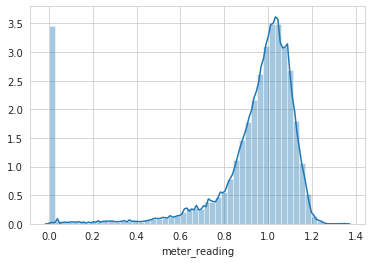

In [0]:
global ax
ax = sns.distplot(train['meter_reading'])
plt.show()

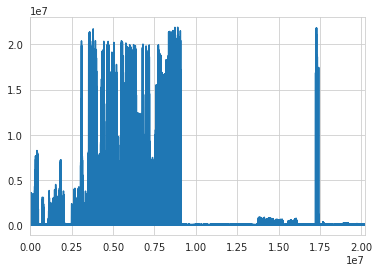

In [0]:
train['meter_reading'].plot()

In [0]:
'''Log tranformation of meter_reading'''
train['meter_reading'] = np.log1p(train['meter_reading'])

bold('**Distribution after log tranformation**')
plotpy.distplot(train['meter_reading'], 'teal')

**Distribution after log tranformation**

NameError: ignored

In [0]:
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"])
train_df["hour"] = train_df["timestamp"].dt.hour
train_df["day"] = train_df["timestamp"].dt.day
train_df["weekday"] = train_df["timestamp"].dt.weekday_name 
train_df["month"] = train_df["timestamp"].dt.month
train_df['year'] = train_df['timestamp'].dt.year

In [11]:
train_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,hour,day,weekday,month,year
3510230,550,0,2016-03-07 02:00:00,59.8500,3,Public services,16000,2,7,Monday,3,2016
12790065,1420,2,2016-08-21 18:00:00,0.0000,15,Entertainment/public assembly,95079,18,21,Sunday,8,2016
11074077,915,1,2016-07-21 21:00:00,614.0420,9,Education,205141,21,21,Thursday,7,2016
4474962,214,1,2016-03-26 05:00:00,3.9037,2,Education,91273,5,26,Saturday,3,2016
14772830,231,0,2016-09-26 01:00:00,74.8600,2,Education,33739,1,26,Monday,9,2016


In [0]:
def distplot(variable, color):
    global ax
    font_size = 16
    title_size = 20
    plt.rcParams['figure.figsize'] = (18, 10)
    ax = sns.distplot(variable, color = color)
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.ylabel('Count ', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title(' Distribution of '+'%s' %variable.name, fontsize = title_size)
    plt.show()

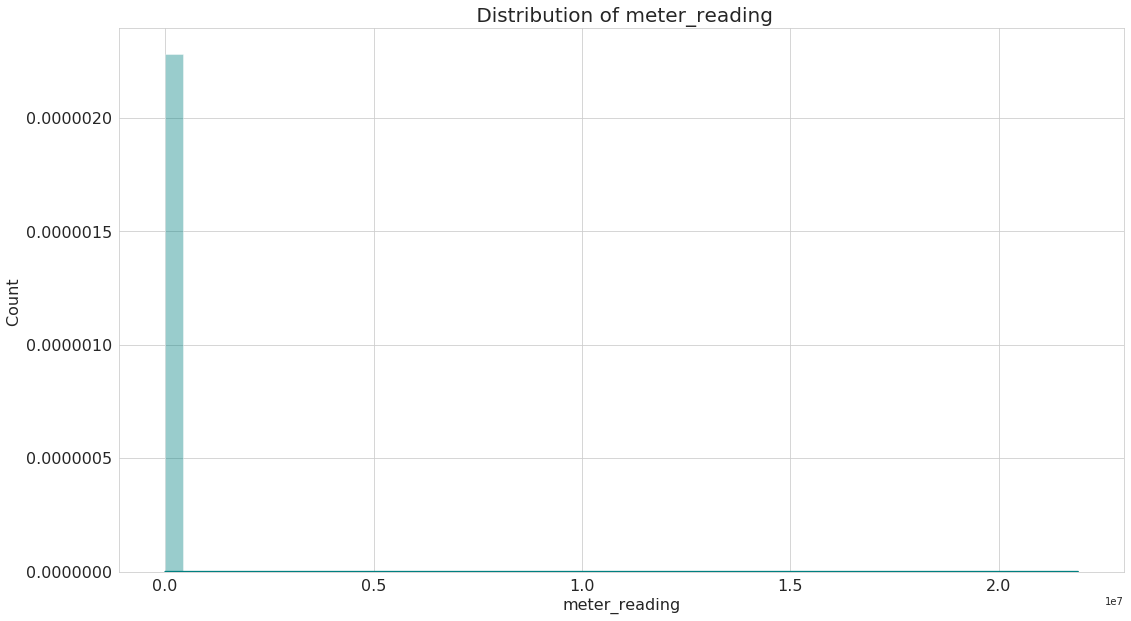

In [0]:
distplot(train['meter_reading'], 'teal')

In [0]:
'''Summary of meter reading'''
train['meter_reading'].describe()

count    2.021610e+07
mean     1.988706e+03
std      1.532159e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.877500e+01
75%      2.679840e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

**Distribution after log tranformation**

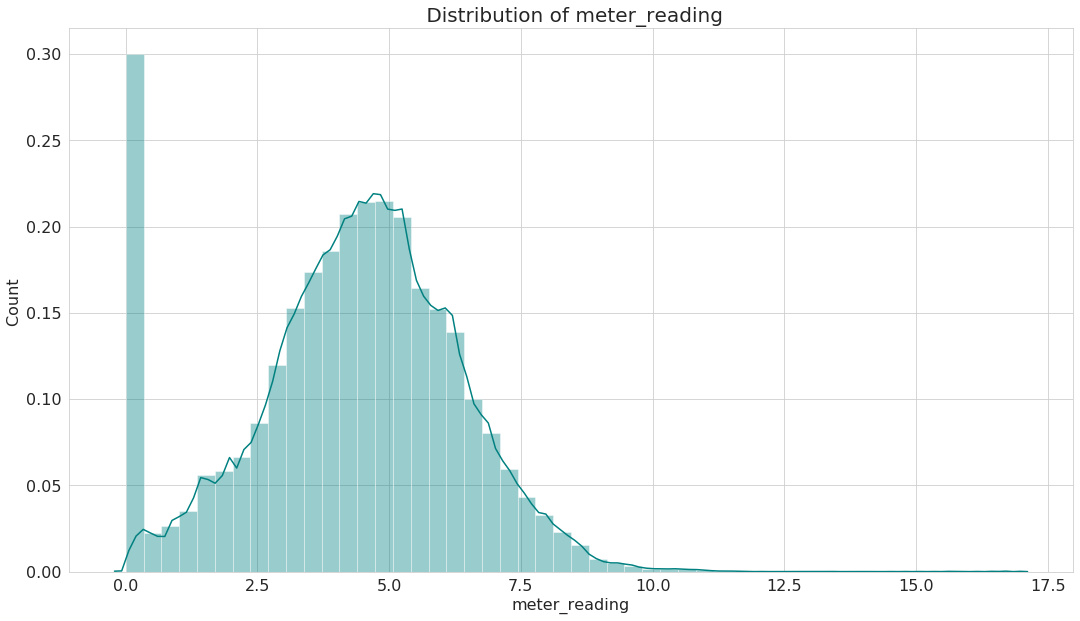

In [0]:
'''Log tranformation of meter_reading'''
train['meter_reading'] = np.log1p(train['meter_reading'])

bold('**Distribution after log tranformation**')
distplot(train['meter_reading'], 'teal')

In [0]:
np.exp(3)

20.085536923187668

In [0]:
sample = get_df('/content/drive/My Drive/K2/sample_submission.csv.zip', 'sample_submission.csv')

In [0]:
sample.shape

(41697600, 2)

In [0]:
sample['meter_reading'] = 20

In [0]:
sample

,row_id,meter_reading
0,0,20
1,1,20
2,2,20
3,3,20
4,4,20
...,...,...
41697595,41697595,20
41697596,41697596,20
41697597,41697597,20
41697598,41697598,20


In [0]:
train_df.to_csv('finally_train.csv', index = False)

In [0]:

zipObj = zipfile.ZipFile('/content/drive/My Drive/K2/finally_train.csv.zip', 'w')
zipObj.write('finally_train.csv', compress_type=zipfile.ZIP_DEFLATED)
zipObj.close()

In [0]:
def get_df(zip_path, csv_path):
    with zipfile.ZipFile(zip_path) as zip:
        with zip.open(csv_path) as csv:
            df = pd.read_csv(csv)
            return df

In [0]:
train_df = get_df('/content/drive/My Drive/K2/finally_train.csv.zip', 'finally_train.csv')

In [14]:
train_df.sample(5)

,meter,meter_reading,site_id,primary_use,square_feet,hour,day,weekday,month
2367495,0,3.916871,13,Office,11.375811,4,13,Saturday,2
13958847,0,7.207919,0,Other,12.330527,15,11,Sunday,9
19913439,2,6.862717,15,Education,11.740117,15,26,Monday,12
733241,0,5.165203,14,Office,11.023111,7,14,Thursday,1
5399420,0,4.550534,13,Office,11.375168,0,12,Tuesday,4


In [0]:
train_df['meter_reading'] = np.log1p(train_df['meter_reading'])
train_df['square_feet'] = np.log(train_df['square_feet'])


In [12]:
train_df.keys()

Index(['meter', 'meter_reading', 'site_id', 'primary_use', 'square_feet',
       'hour', 'day', 'weekday', 'month'],
      dtype='object')

In [5]:
train_df.pop('building_id')
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"])
train_df["hour"] = train_df["timestamp"].dt.hour
train_df["day"] = train_df["timestamp"].dt.day
train_df["weekday"] = train_df["timestamp"].dt.weekday_name 
train_df["month"] = train_df["timestamp"].dt.month
#train_df['year'] = train_df['timestamp'].dt.year
train_df.pop('timestamp')


KeyError: ignored

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

import zipfile

TensorFlow 2.x selected.


In [0]:
train_df, val_df = train_test_split(train_df, test_size=0.2)

In [0]:
def get_ds(dataframe, label = None, shuffle=False, batch_size=32):
    dataframe = dataframe.copy()
    if label:
        label = dataframe.pop(label)
        dataset = tf.data.Dataset.from_tensor_slices((dict(dataframe), label))
    else:
        dataset = tf.data.Dataset.from_tensor_slices(dict(dataframe))
    return dataset

In [0]:
train_ds = get_ds(train_df, label = 'meter_reading')
val_ds = get_ds(val_df, label = 'meter_reading')

In [0]:
train_ds = train_ds.shuffle(10000).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.batch(32)

In [5]:
train_df.dtypes

meter              int64
meter_reading    float64
site_id            int64
primary_use       object
square_feet      float64
hour               int64
day                int64
weekday           object
month              int64
dtype: object

In [11]:
train_df['primary_use'].unique().tolist()

['Entertainment/public assembly',
 'Education',
 'Office',
 'Public services',
 'Lodging/residential',
 'Technology/science',
 'Manufacturing/industrial',
 'Other',
 'Food sales and service',
 'Services',
 'Healthcare',
 'Warehouse/storage',
 'Utility',
 'Retail',
 'Parking',
 'Religious worship']

In [36]:
train_df['meter'].values

array([0, 0, 1, ..., 3, 1, 2])

In [10]:
feature_columns = []

feature_columns.append(feature_column.numeric_column('square_feet'))

feature_columns.append(tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_identity('meter', 4)))
feature_columns.append(tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_identity('site_id', 16)))

feature_columns.append(tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list('primary_use', train_df['weekday'].unique().tolist())))
feature_columns.append(tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list('weekday', train_df['weekday'].unique().tolist())))
feature_columns.append(tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_identity('hour', 25)))
feature_columns.append(tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_identity('day', 32)))
feature_columns.append(tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_identity('month', 13)))

feature_columns

[NumericColumn(key='square_feet', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 IndicatorColumn(categorical_column=IdentityCategoricalColumn(key='meter', number_buckets=4, default_value=None)),
 IndicatorColumn(categorical_column=IdentityCategoricalColumn(key='site_id', number_buckets=16, default_value=None)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='primary_use', vocabulary_list=('Friday', 'Wednesday', 'Monday', 'Tuesday', 'Saturday', 'Sunday', 'Thursday'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='weekday', vocabulary_list=('Friday', 'Wednesday', 'Monday', 'Tuesday', 'Saturday', 'Sunday', 'Thursday'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=IdentityCategoricalColumn(key='hour', number_buckets=25, default_value=None)),
 IndicatorColumn(categorical_column=IdentityCategoricalColumn(key='day', 

In [0]:
feature_layer = layers.DenseFeatures(feature_columns)

In [0]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='mse',
              metrics=['mse'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=5)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/5
  29077/Unknown - 342s 12ms/step - loss: 0.6135 - mse: 0.6135

In [0]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

In [0]:
example_batch = next(iter(train_ds))[0]

In [0]:
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy().shape)

In [18]:
demo(feature_column.numeric_column('square_feet'))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



ValueError: ignored

In [30]:
print(feature_layer(example_batch).numpy())


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



ValueError: ignored